#### Imports & Constants

In [17]:
import pathlib
import pandas as pd
import numpy as np
import sys
import pathlib
sys.path.append(pathlib.Path("..").resolve().as_posix())
from src.coder import TargetCoder

encoded_df = pd.read_csv(pathlib.Path("..") / "data" / "encoded" / "encoded_data.csv")

##### PCA Dimensionality Reduction

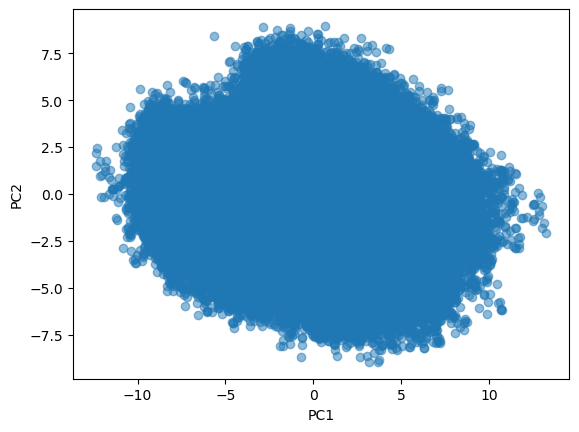

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

scaler = StandardScaler()
scaled_df = scaler.fit_transform(encoded_df.iloc[:, :-1])
pca = PCA(n_components=2)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

# Plot pca 2d
plt.scatter(pca_df[:, 0], pca_df[:, 1],cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# use random forest regressor
rf = RandomForestRegressor(n_estimators=70, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(pca_df, encoded_df['position'], test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(f'Random Forest Regressor score: {score}')

Random Forest Regressor score: 0.7959749279603181
